## 1번 
#### 유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 
#### 그리고 모델의 정확도와 confusion matrix를 구하라.
#### 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
#### -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import matplotlib


from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
 
# 분류모델 평가 함수 
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report 

In [2]:
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

In [3]:
df_raw = pd.read_csv("D:/data/2/유방암.csv", encoding = 'EUC-KR')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "음성", 0, 1)
df_raw.head()


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
# 결측치 확인 
df_raw.isnull().sum(axis=0) 
# 결측치가 없음

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

<AxesSubplot:>

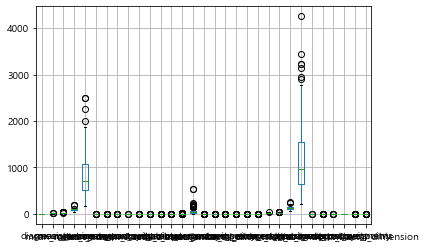

In [6]:
df_raw.boxplot()

<AxesSubplot:>

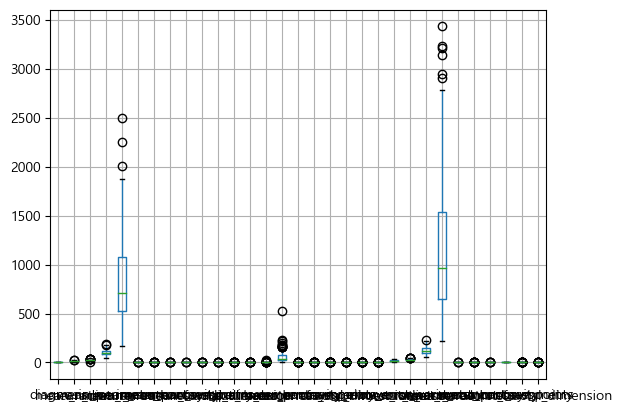

In [7]:
#이상치 제거
df_raw = df_raw[df_raw["worst_area"]<4000] 
df_raw.boxplot()

In [8]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [9]:
# 더미변수 생성
# 설명변수, 목표변수, 데이터 구분
# 설명변수 설정
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False)
# 목표변수 설정
df_raw_y=df_raw_dummy["diagnosis"] 


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state =1234)
#train 0.6 test 0.4 

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터: Train', df_train_x.shape, ' Test', df_test_x.shape)

분할 전 설명변수 데이터: (319, 30)
분할 후 설명변수 데이터: Train (191, 30)  Test (128, 30)


In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state =1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))
tree_uncustomized 
# 모델 정확도는 train 100% test, test 92.2%로 유사한 수준이나
# 모델은 train 데이터에 부분적으로 과대적합 되어 있습니다.

Accuracy on training set: 1.000
Accuracy on test set: 0.922


DecisionTreeClassifier(random_state=1234)

In [11]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 데이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy 

In [12]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.898
1,2,0.953,0.898
2,3,0.990,0.906
3,4,1.000,0.922
4,5,1.000,0.922
5,6,1.000,0.922
6,7,1.000,0.922
7,8,1.000,0.922
8,9,1.000,0.922
9,10,1.000,0.922


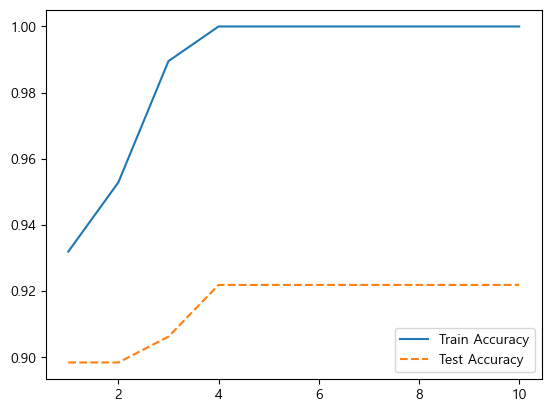

In [13]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

# 최대 깊이 증가에 따라 모델의 정확도는 증가하며
# train/test 데이터의 성능 변화를 고려하여 2 선택

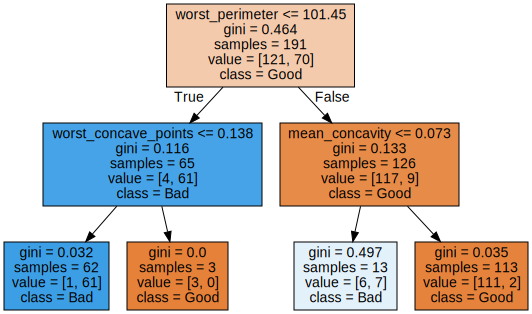

In [14]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 2, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장.
# (목표변수, 0:Good, 1:Bad)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

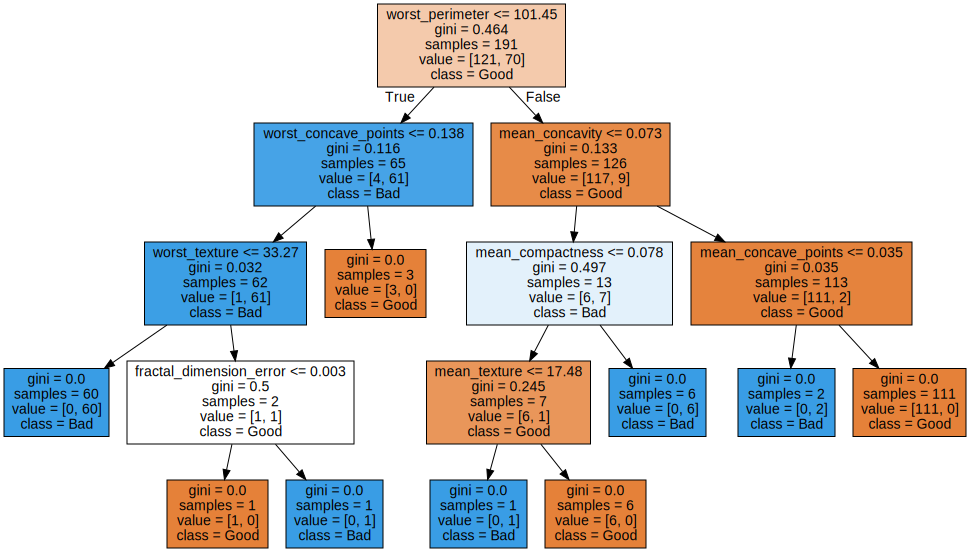

In [15]:
tree_high = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [16]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.990,0.906
1,20,0.963,0.891
2,30,0.963,0.891
3,40,0.963,0.891
4,50,0.963,0.891
5,60,0.963,0.891
6,70,0.948,0.883
7,80,0.948,0.883
8,90,0.948,0.883
9,100,0.948,0.883


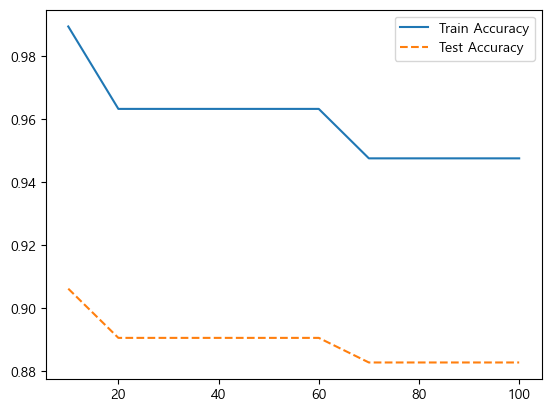

In [17]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()
# split 20과 60 선택

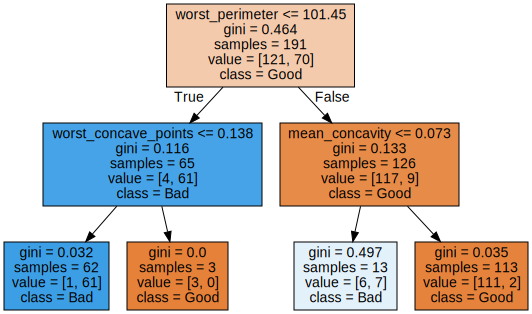

In [18]:
tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

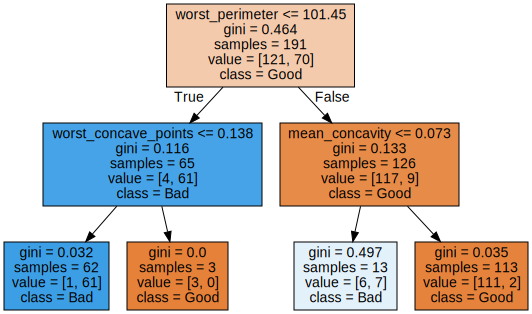

In [19]:
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=60, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 최종적으로 20으로 결정

In [20]:
train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=20, max_depth =2, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.953,0.898
1,4,0.948,0.898
2,6,0.937,0.875
3,8,0.937,0.883
4,10,0.937,0.883
5,12,0.937,0.883
6,14,0.932,0.898
7,16,0.932,0.898
8,18,0.932,0.898
9,20,0.932,0.898


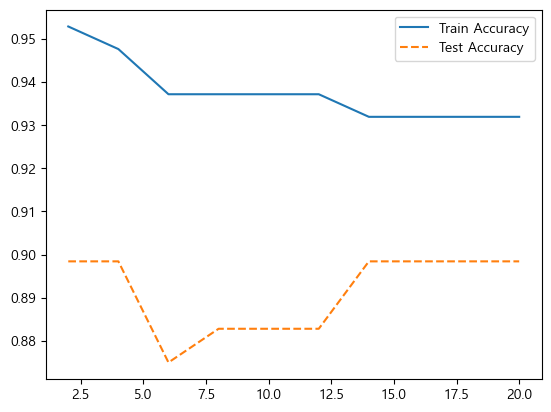

In [21]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.legend()
#leaf 6과 12로 결정

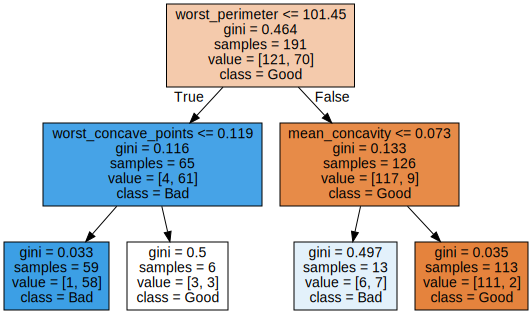

In [22]:

tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, min_samples_leaf = 6, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

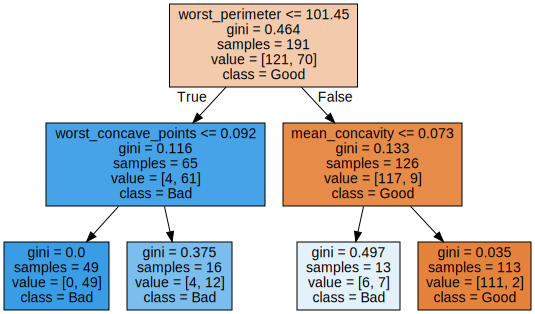

In [23]:
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, min_samples_leaf=12, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
#최종적을 12로 결정

In [24]:
tree_final = DecisionTreeClassifier(max_depth = 2, min_samples_split = 20, min_samples_leaf = 12, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, min_samples_split=20,
                       random_state=1234)

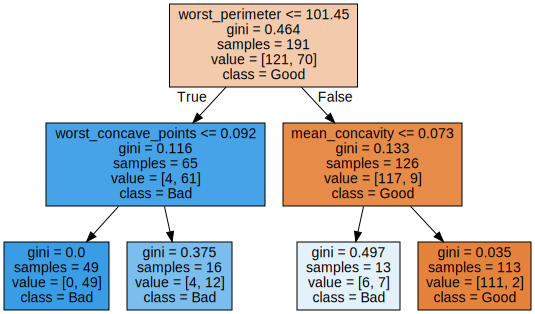

In [25]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dor_graph = f.read()
display(graphviz.Source(dot_graph))

In [26]:
y_pred = tree_final.predict(df_test_x)

# 정확도 (0.8828)
print("Accuracy: {0:.4f}\n".format(tree_final.score(df_test_x, df_test_y))) 
# Confusion Matrix
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred))) 

Accuracy: 0.8828

Confusion Matrix:
[[79 11]
 [ 4 34]]


In [27]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)

# 중요변수 확인
df_importance.round(3) 

,Feature,Importance
22,worst_perimeter,0.892
6,mean_concavity,0.087
27,worst_concave_points,0.021
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
23,worst_area,0.000


Text(0, 0.5, '설명변수')

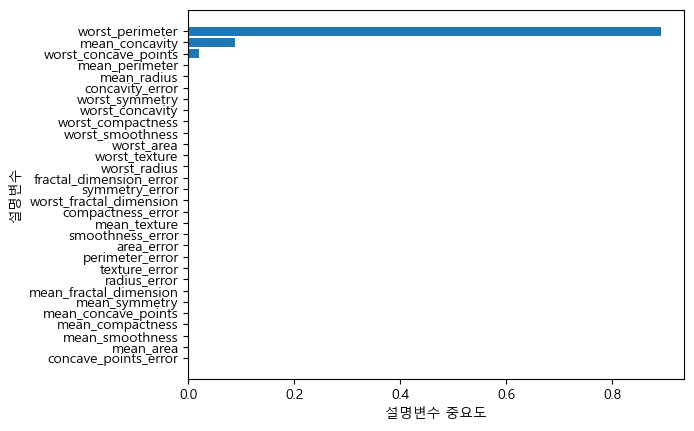

In [28]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [29]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(4))) 
# 최적은(best score)은 0.9163
# 내가 뽑은 (0.8828)과 0.9163은 차이가 별로 안남 

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.9163


In [30]:
#예측값
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,128.000000
mean,0.351562
std,0.479334
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [31]:
#실제값
df_test_y.describe() 

count    128.000000
mean       0.296875
std        0.458676
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

#### test결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무입니다

## 2번 
#### 유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 
#### 그리고 모델의 정확도와 confusion matrix를 구하라.
#### 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
####  -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개)

In [32]:
df_raw = pd.read_csv("D:/data/2/유방암.csv", encoding = 'EUC-KR')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [33]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "음성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [34]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

<AxesSubplot:>

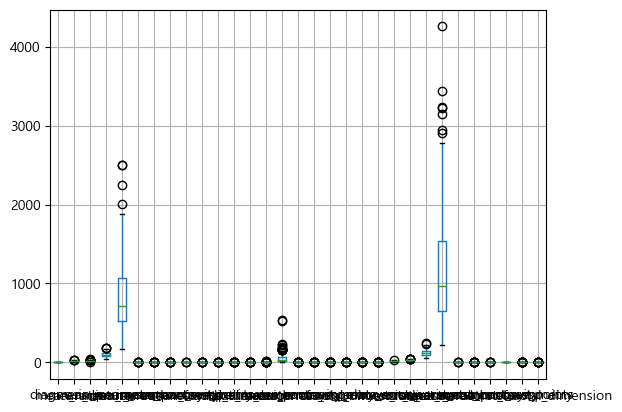

In [35]:
df_raw.boxplot()

<AxesSubplot:>

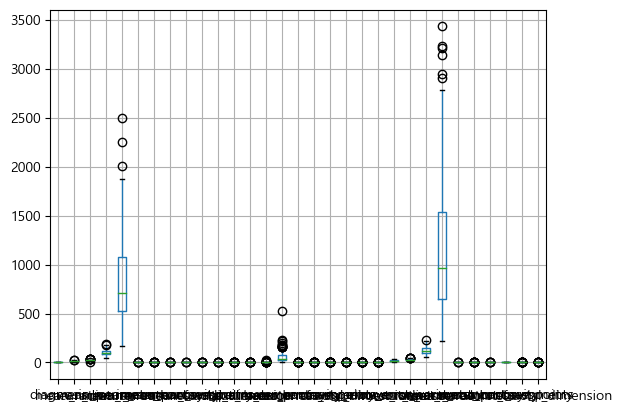

In [36]:
df_raw = df_raw[df_raw["worst_area"]<4000] 
df_raw.boxplot()

In [37]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [38]:
df_raw_x = df_raw_dummy.drop("diagnosis", axis=1, inplace=False) 
df_raw_y = df_raw_dummy["diagnosis"] 

In [39]:
# 더미변수 생성
# 설명변수, 목표변수, 데이터 구분
# 설명변수 설정
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False)
# 목표변수 설정
df_raw_y=df_raw_dummy["diagnosis"] 


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state =1234)
#train 0.6 test 0.4 

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터: Train', df_train_x.shape, ' Test', df_test_x.shape)

분할 전 설명변수 데이터: (319, 30)
분할 후 설명변수 데이터: Train (191, 30)  Test (128, 30)


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_uncustomized = RandomForestClassifier(random_state =1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
rf_uncustomized 

# 모델 정확도는 train 100% test, test 93 %로 유사한 수준이나
# 모델은 train 데이터에 부분적으로 과대적합 되어 있습니다.

Accuracy on training set: 1.000
Accuracy on test set: 0.930


RandomForestClassifier(random_state=1234)

In [42]:
train_accuracy = []; test_accuracy =[]
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [43]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.922
1,20,0.995,0.938
2,30,1.000,0.938
3,40,1.000,0.930
4,50,1.000,0.930
5,60,1.000,0.930
6,70,1.000,0.922
7,80,1.000,0.922
8,90,1.000,0.930
9,100,1.000,0.930


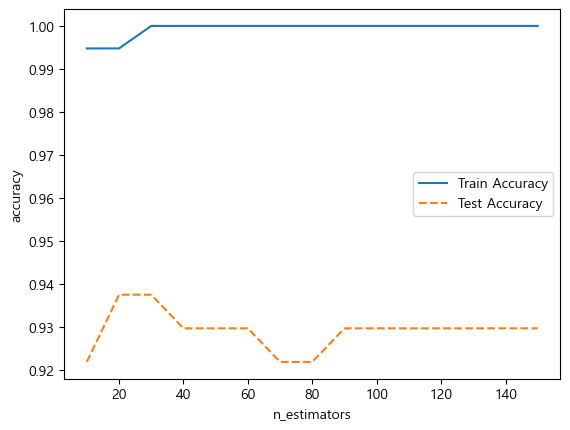

In [44]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [45]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comp

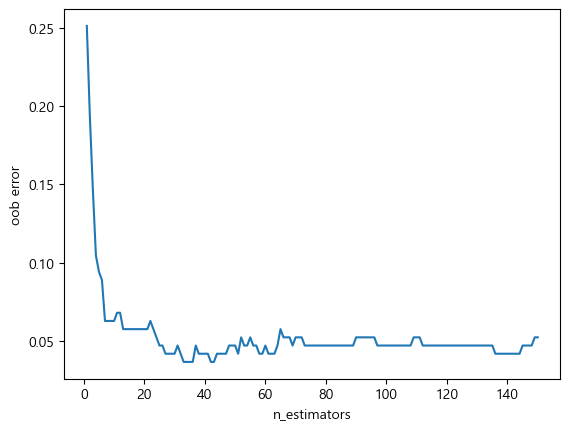

In [46]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")
n_estimators=20 

In [47]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators= 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.958,0.906
1,2,0.963,0.914
2,3,0.995,0.914
3,4,0.995,0.930
4,5,1.000,0.930
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


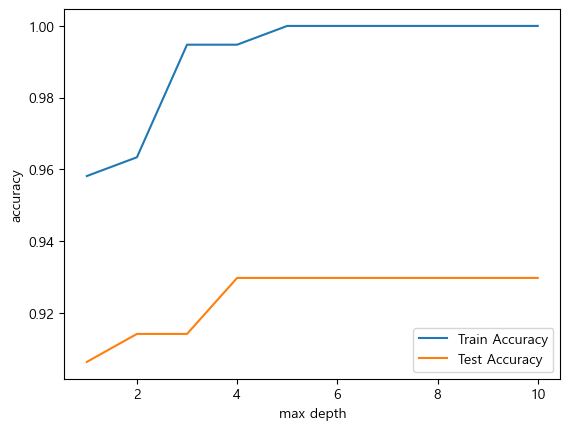

In [48]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()


In [49]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth =3, n_estimators =20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.922
1,20,0.984,0.922
2,30,0.984,0.922
3,40,0.984,0.898
4,50,0.974,0.922
5,60,0.963,0.906
6,70,0.953,0.891
7,80,0.958,0.891
8,90,0.948,0.906
9,100,0.948,0.906


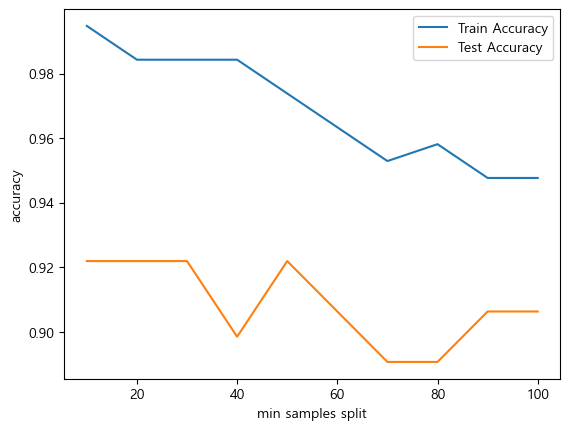

In [50]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()


In [51]:
train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf* 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth =3, n_estimators = 20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.984,0.898
1,20,0.963,0.906
2,30,0.958,0.891
3,40,0.953,0.883
4,50,0.963,0.891
5,60,0.969,0.883
6,70,0.634,0.703
7,80,0.634,0.703
8,90,0.634,0.703
9,100,0.634,0.703


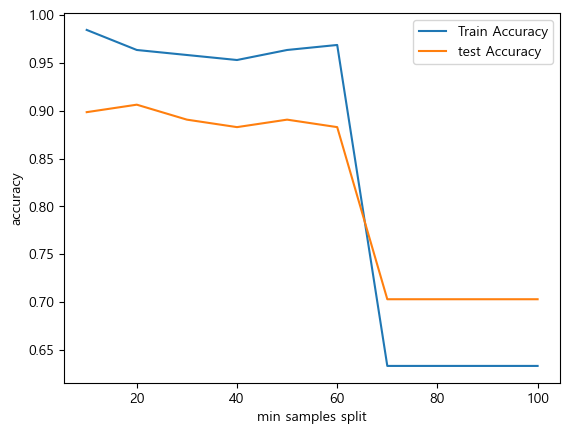

In [52]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [53]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators= 100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y))) 
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y))) 
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.906

Accuracy on test set: 0.906

Confusion Matrix:
[[85  5]
 [ 7 31]]


In [54]:
v_feaure_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3) 

,Feature,Importance
22,worst_perimeter,0.201
6,mean_concavity,0.125
20,worst_radius,0.124
7,mean_concave_points,0.111
27,worst_concave_points,0.098
23,worst_area,0.082
26,worst_concavity,0.072
2,mean_perimeter,0.051
0,mean_radius,0.036
3,mean_area,0.018


Text(0, 0.5, '설명변수')

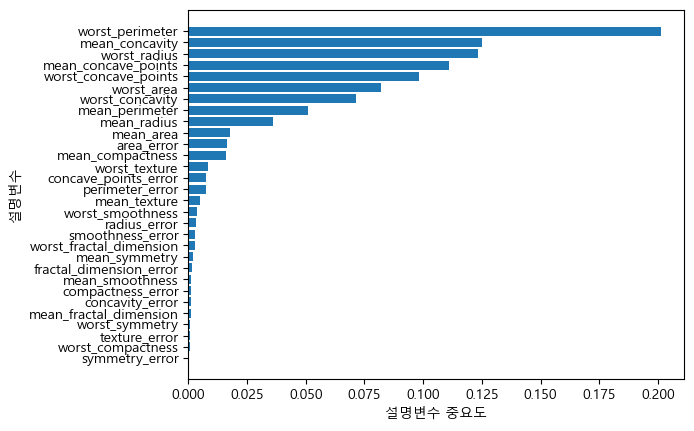

In [55]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [56]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3))) 

best estimator model: 
RandomForestClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10,
                       random_state=1234)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score: 
0.948


In [57]:
df_pred = pd.DataFrame({'prediction':rf_final.predict(df_test_x)})
df_pred.describe()

,prediction
count,128.000000
mean,0.281250
std,0.451376
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [58]:
df_test_y.describe()

count    128.000000
mean       0.296875
std        0.458676
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

## test결과 예측값과 실제값이 비슷하므로 잘 설계된 랜덤포레스트입니다.